In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 데이터 준비
* sklearn에서 제공하는 샘플 데이터 활용

In [2]:
from sklearn.datasets import load_iris 
iris = load_iris()
print(type(iris))
# print('data:', iris.data)
# print('data:', iris.feature_names)
# print('data:', iris.target)
# print('data:', iris.target_names)

df_iris = pd.DataFrame(iris.data,
             columns = iris.feature_names)
df_iris["species"] = iris.target
df_iris.head(3)


# df_iris["species"] = df_iris["species"].map(dict(zip([0,1,2], iris.target_names)))

<class 'sklearn.utils._bunch.Bunch'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB



#### 데이터 탐색

In [4]:
# -----------------------------------
# 종속변수 빈도수 확인
#   불균형 여부 확인
# -----------------------------------
df_iris['species'].value_counts()


species
0    50
1    50
2    50
Name: count, dtype: int64

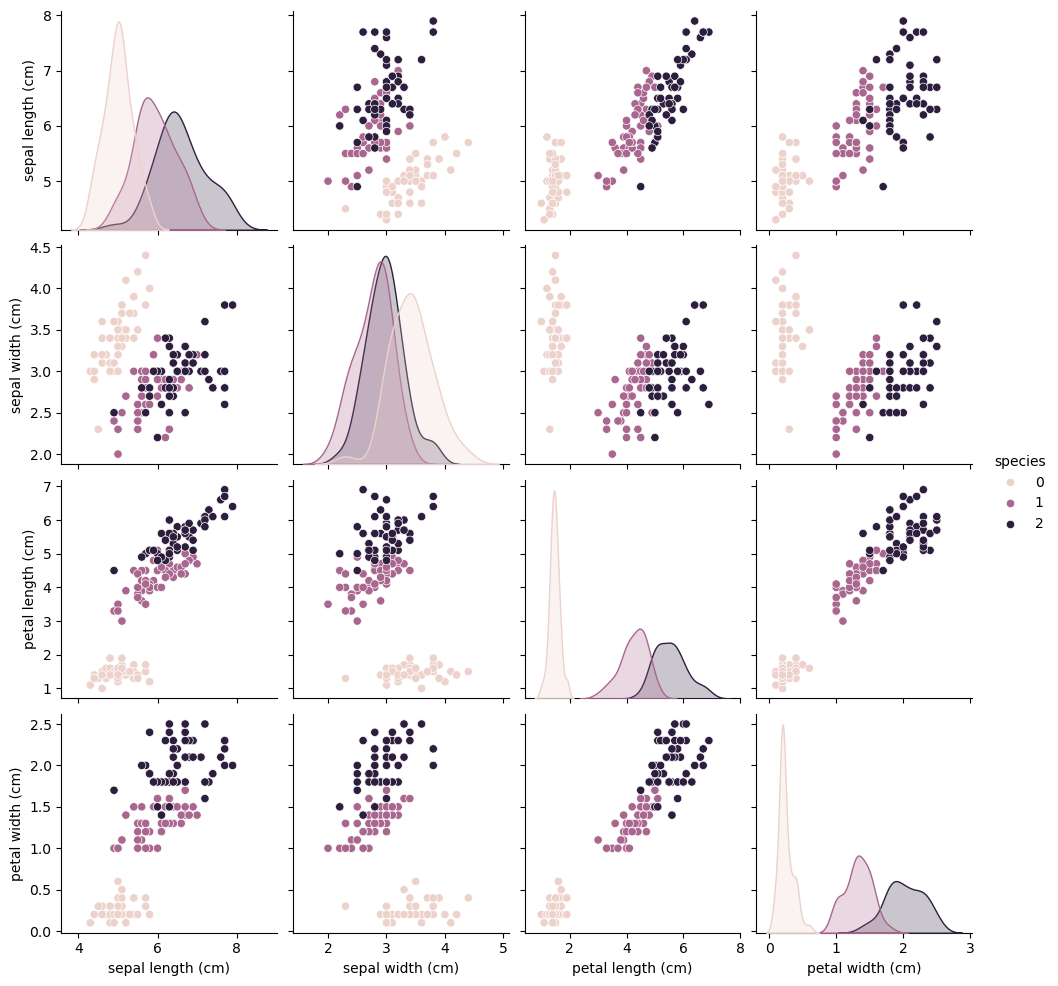

In [6]:
# -----------------------------------
# 시각화
# -----------------------------------
sns.pairplot(df_iris, hue='species')

#### 데이터 선택

In [ ]:
# ----------------
# X, y
# ----------------
X = df_iris.drop(['species'], axis = 1)
y = df_iris['species']


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

#### 학습용 데이터와 테스트용 데이터 분할

In [22]:
# ----------------
# 균등분할
#   stratify
# ----------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 데이터의 크기 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [23]:
y_test.value_counts()
y_train.value_counts()

species
0    38
2    37
1    37
Name: count, dtype: int64

#### 모델 생성 및 학습

In [24]:
# ---------------------------------------
# DecisionTreeClassifier 모델 생성
# ---------------------------------------
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# ---------------------------------------
# 모델 학습
# ---------------------------------------
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### 모델 평가

In [26]:
# ---------------------------------------
# 테스트용 데이터로 예측 
# ---------------------------------------
pred = model.predict(X_test)
print(pred)
print(np.array(y_test))


[0 1 1 1 0 1 1 2 2 2 1 2 1 1 0 0 0 1 0 1 2 1 1 1 2 1 0 2 0 2 2 2 0 0 0 0 2
 1]
[0 1 1 1 0 1 2 2 2 2 2 2 1 1 0 0 0 1 0 1 2 1 2 1 2 1 0 2 0 1 2 2 0 0 0 0 2
 1]


In [27]:
# ---------------------------------------
# 정확도 평가
# ---------------------------------------
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8947368421052632

In [29]:
# ---------------------------------------
# 분류 모델의 평가지표 리포트
#   support : 해당 클래스의 표본 수
#   macro avg : 클래스 별 지표의 단순 평균
#   weighted avg 
#       클래스별 지표(precision‧recall‧f1-score)를 해당 클래스의 샘플 수(support)로 가중평균한 값
#       데이터 불균형이 있을 때 전체 모델 성능을 현실적으로 보여준다
#       weighted ave 값이 매우 높으면 다수 클래스가 모델 평가의 대부분을 차지한다는 의미
# ---------------------------------------
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      0.92      0.86        13
           2       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38



<Axes: >

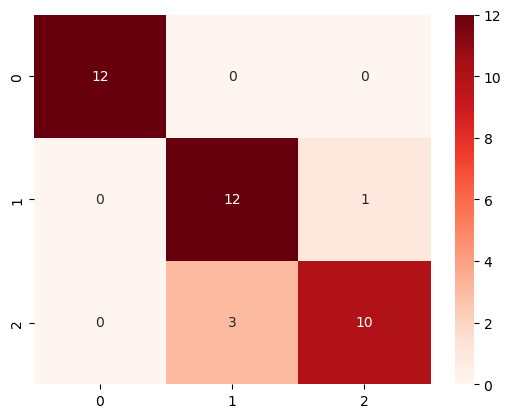

In [35]:
# --------------------------------
# 혼동행렬 (행=실제, 열=예측)
# --------------------------------
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, cmap="Reds", annot=True)

#### 의사결정트리 모델의 학습 결과

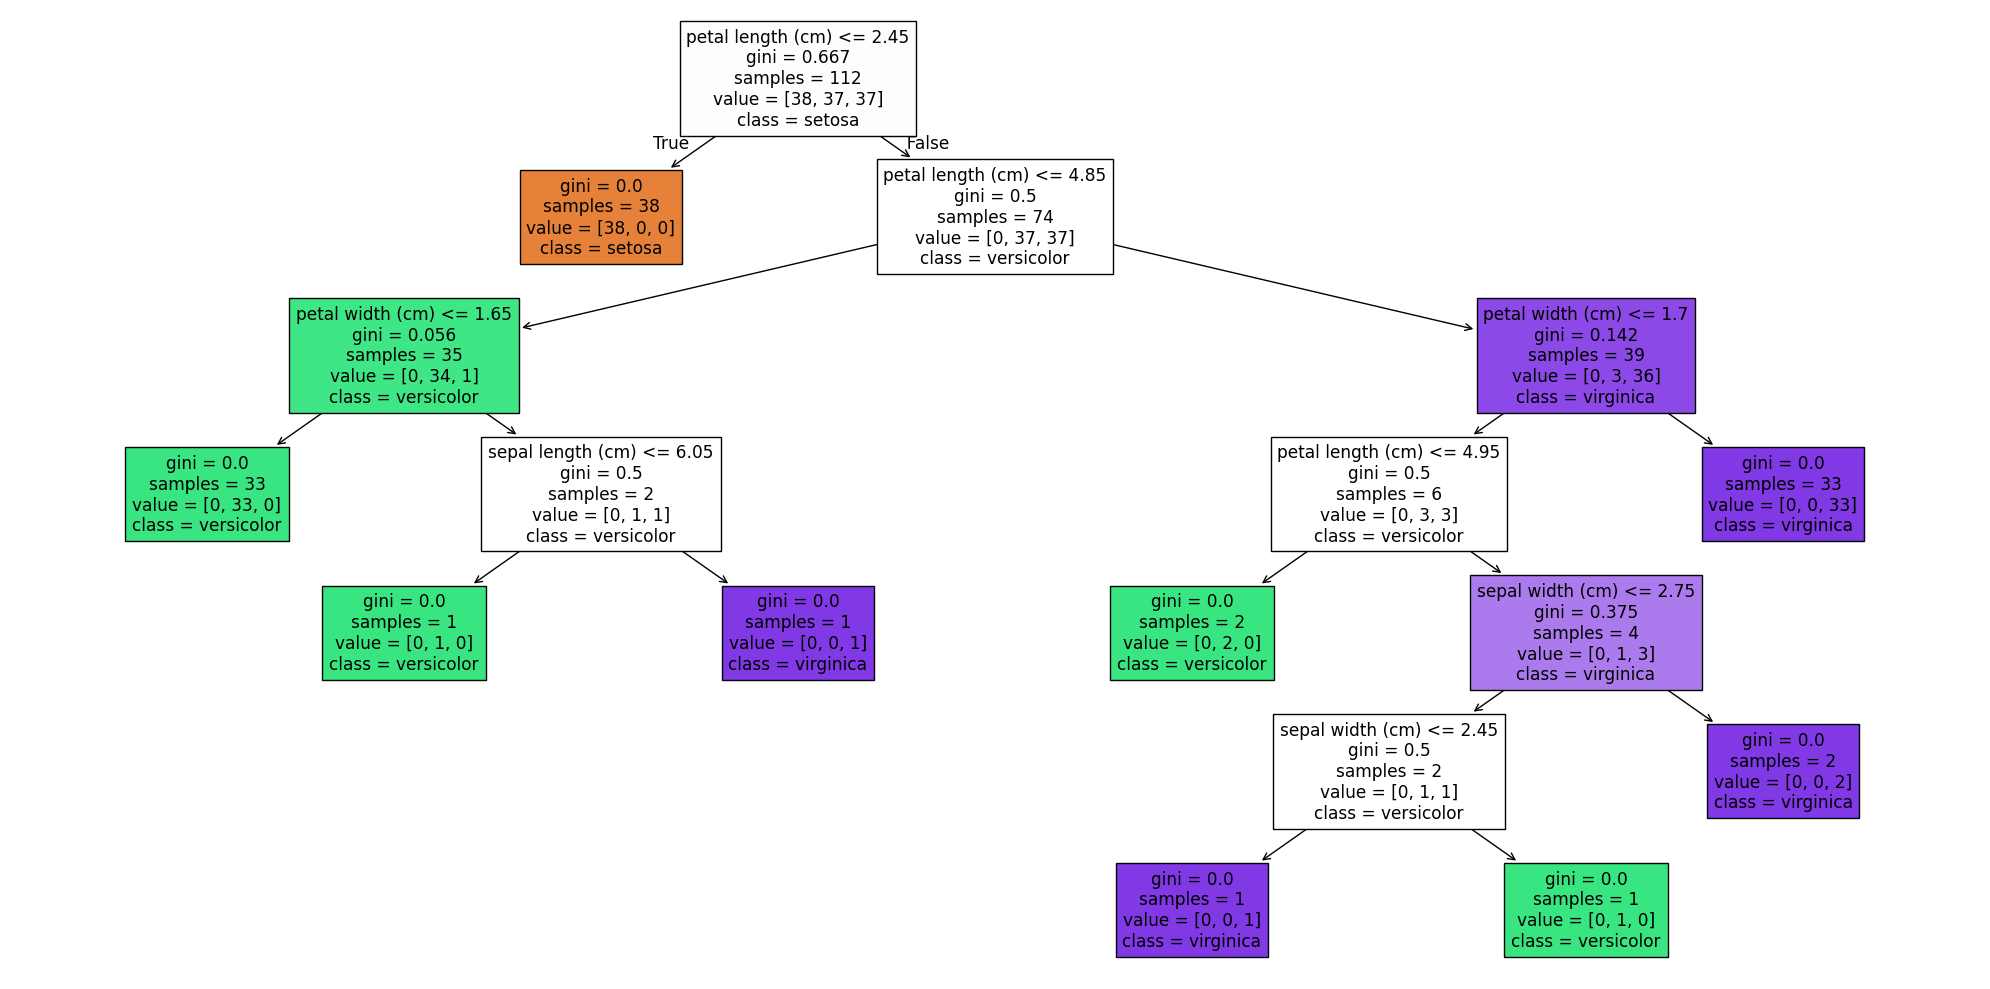

In [46]:
# 트리 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True
          )
plt.tight_layout()
pass

In [37]:
plot_tree?

Signature:
plot_tree(
    decision_tree,
    *,
    max_depth=None,
    feature_names=None,
    class_names=None,
    label='all',
    filled=False,
    impurity=True,
    node_ids=False,
    proportion=False,
    rounded=False,
    precision=3,
    ax=None,
    fontsize=None,
)
Docstring:
Plot a decision tree.

The sample counts that are shown are weighted with any sample_weights that
might be present.

The visualization is fit automatically to the size of the axis.
Use the ``figsize`` or ``dpi`` arguments of ``plt.figure``  to control
the size of the rendering.

Read more in the :ref:`User Guide <tree>`.

.. versionadded:: 0.21

Parameters
----------
decision_tree : decision tree regressor or classifier
    The decision tree to be plotted.

max_depth : int, default=None
    The maximum depth of the representation. If None, the tree is fully
    generated.

feature_names : array-like of str, default=None
    Names of each of the features.
    If None, generic names will be used ("x[0]

In [47]:
# --------------------------
# 트리의 깊이
#   get_depth()
# --------------------------
model.get_depth()

6

In [49]:
model.feature_importances_

array([0.01339392, 0.02009089, 0.91988667, 0.04662852])

<Axes: >

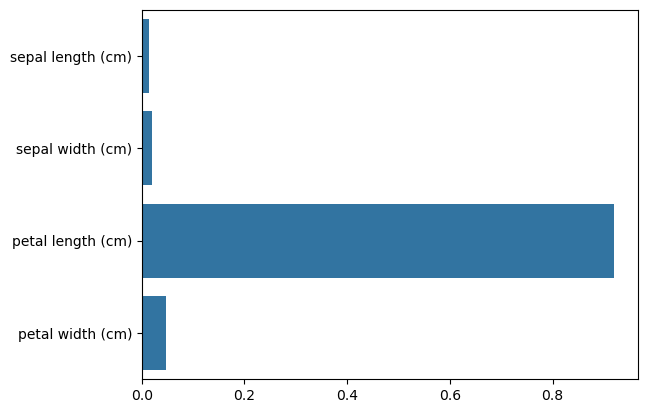

In [51]:
# --------------------------
# feature_importances_
# --------------------------
model.feature_importances_
sns.barplot(y=iris.feature_names, x = model.feature_importances_)
